# Using `K-means` for image compression


Clustering can be used for image compression. The scheme is surprisingly simple: similar, adjacent colors should be combined into one color. Let's do it ourselves. You will work with the following image.

Read the image from your individual assignment.

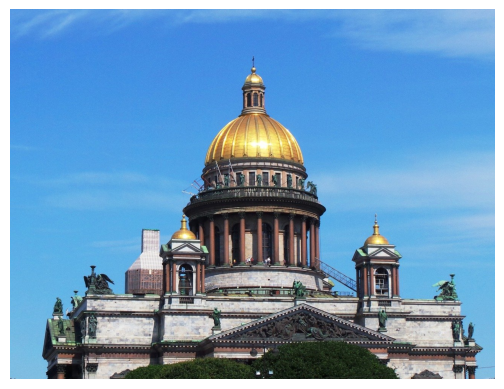

In [1]:
import matplotlib.pyplot as plt
#from google.colab.patches import cv2_imshow
import cv2
import numpy as np


# Путь к изображению
img_path = '/Users/lune/Education/Machine learning/Clustering/spb_st_isaacs_2.jpg'

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)

The image shown is a three-channel (RGB) image. Calculate the average pixel intensity across all channels.

In [5]:
# < ENTER YOUR CODE HERE > 
round(np.mean(img, axis=-1).mean(),3)

(976, 1280, 3)

Normalize pixel intensity values by dividing all values by $255$. Calculate the average value of pixel intensity for all channels after the transformation has been done.

In [12]:
# < ENTER YOUR CODE HERE > 
round(np.mean(img/255, axis=-1).mean(),3)
img = img/255

Let's make sure that the original color space with about $16$ million possible states ($256^3$) is too large, and its dimensionality can be reduced. For clarity, let's build only some subsamples of dependencies of intensity values and only on a random subset of pixels.

"Straighten" the image so that <code>.shape</code> of the corresponding array has the following form <code>(height * width, 3)</code>.

In [17]:
# The function takes as input a "straightened" array corresponding to the image

def plot_pixels(data, colors=None, N=10000):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

In [13]:
img.shape

(976, 1280, 3)

In [15]:
# < ENTER YOUR CODE HERE > 
height, width, channels = img.shape
img = img.reshape(height * width, channels)

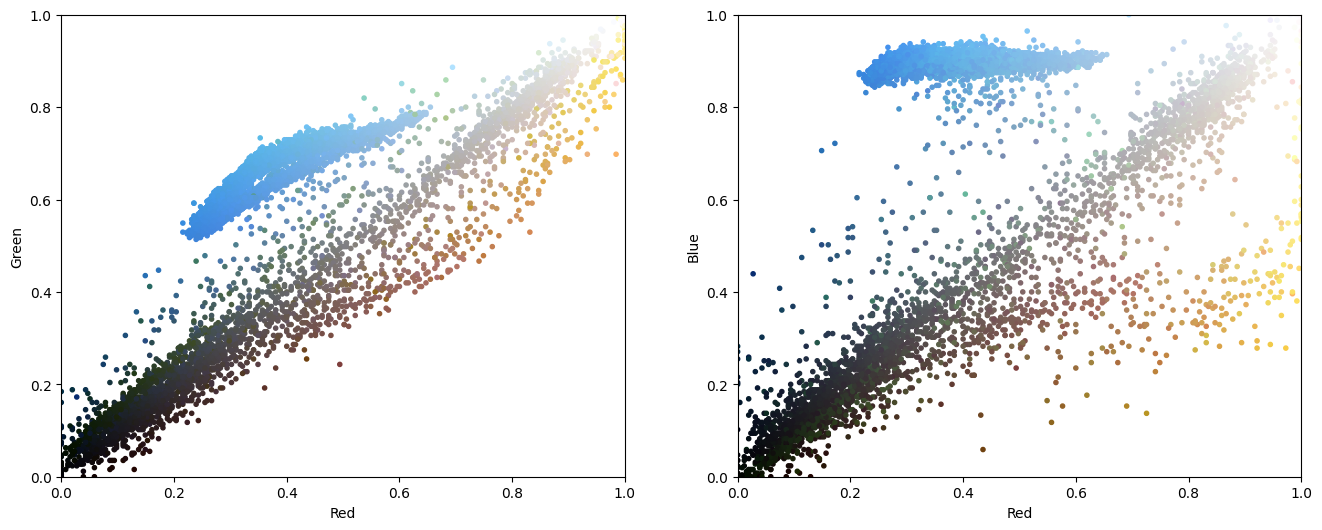

In [18]:
plot_pixels(img)

Let's transform $16$ million possibilities into just $16$ possibilities by using <code>K-means</code>. To speed up the algorithm, we'll use <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html"><code>K-means</code></a> on batches (subsets of the dataset). We'll see if this spoils the result.

Train the <code>MiniBatchKMeans</code> model on a normalized and "straightened" image with the parameters specified in your assignment.

In the image, replace the color values of each pixel with the coordinate values of the centroid of the cluster to which the pixel was assigned. Plot color dependency graphs using <code>plot_pixels()</code> with the new palette (the parameter <code>colors</code>).

In [20]:
from sklearn.cluster import MiniBatchKMeans

In [21]:
# < ENTER YOUR CODE HERE > 
kmeans = MiniBatchKMeans(n_clusters=16, random_state=10)
kmeans.fit(img)



/Users/lune/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


MiniBatchKMeans(n_clusters=16, random_state=10)

In [27]:
compressed_image = kmeans.cluster_centers_[kmeans.labels_]
compressed_image = compressed_image.reshape((height, width, channels))

Calculate the average pixel intensity value of the resulting image.

In [28]:
# < ENTER YOUR CODE HERE > 
round(np.mean(compressed_image),3)

0.554

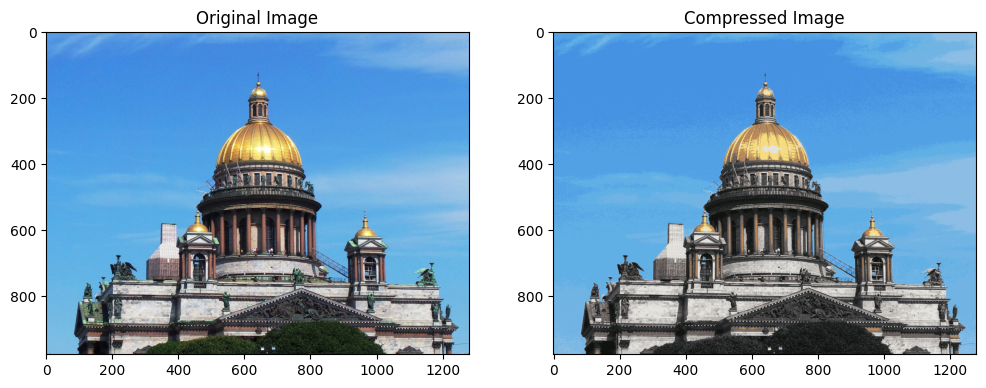

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(img.reshape(height, width, channels))
ax[0].set_title("Original Image")

ax[1].imshow(compressed_image)
ax[1].set_title("Compressed Image")

plt.show()

Enter the image number that corresponds to the $16$ color palette.

In [35]:
kmeans.cluster_centers_

array([[0.27358436, 0.57347591, 0.88674735],
       [0.11856812, 0.12942872, 0.12344465],
       [0.80288731, 0.79387201, 0.78065934],
       [0.43662497, 0.39060421, 0.37429687],
       [0.32402721, 0.63326312, 0.89970342],
       [0.28735681, 0.28730058, 0.29553026],
       [0.89556969, 0.88848967, 0.86956015],
       [0.55926333, 0.55939161, 0.55623969],
       [0.05928935, 0.07112989, 0.05762106],
       [0.54537126, 0.74493732, 0.89949641],
       [0.95707358, 0.86291377, 0.49825005],
       [0.37824031, 0.68698186, 0.90057048],
       [0.19245113, 0.19953157, 0.20630574],
       [0.72002614, 0.53560784, 0.35069281],
       [0.7068401 , 0.68737462, 0.66810328],
       [0.4441272 , 0.70954291, 0.89560733]])

In [ ]:
# < ENTER YOUR CODE HERE > 
plot_pixels(img, colors=kmeans.cluster_centers_)

Construct an image of size $4 \times 4$ based on the $16$ colors obtained. Select the correct image.

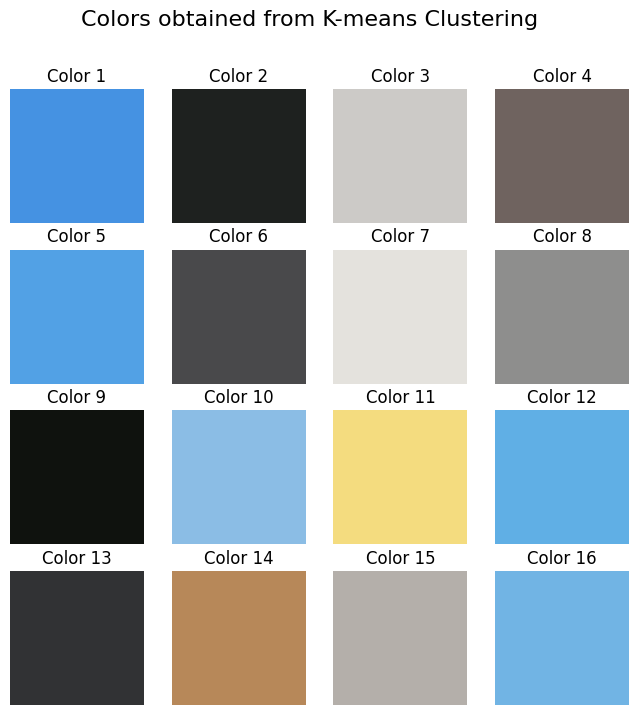

In [34]:
# < ENTER YOUR CODE HERE > 
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
fig.suptitle('Colors obtained from K-means Clustering', fontsize=16)

for i, ax in enumerate(axes.flatten()):
    color = kmeans.cluster_centers_[i]
    color_image = np.zeros((10, 10, 3))
    color_image[:, :] = color
    ax.imshow(color_image)
    ax.axis('off')
    ax.set_title(f'Color {i + 1}')

plt.show()

It's time to look at the result! Line up next to the original image and an image that uses only $16$ of colors.